In [30]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [31]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [32]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [33]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [34]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [35]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00b87dbdab3df67364d83ea94d272af9


In [36]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [37]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | kieta
Processing Record 6 of Set 1 | rorvik
Processing Record 7 of Set 1 | fort nelson
Processing Record 8 of Set 1 | mount gambier
Processing Record 9 of Set 1 | lasem
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | xining
Processing Record 13 of Set 1 | upernavik
Processing Record 14 of Set 1 | canela
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | homer
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | narsaq
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | villa alemana
Processing Record 22 of Set 1 | mehriz
Processing Record 23 of Set 1 | rikitea
Processing Record 24

Processing Record 38 of Set 4 | nouakchott
Processing Record 39 of Set 4 | castlegar
Processing Record 40 of Set 4 | bratsk
Processing Record 41 of Set 4 | cascais
Processing Record 42 of Set 4 | torbay
Processing Record 43 of Set 4 | srandakan
Processing Record 44 of Set 4 | mehamn
Processing Record 45 of Set 4 | moscow
Processing Record 46 of Set 4 | bandarbeyla
Processing Record 47 of Set 4 | cockburn town
Processing Record 48 of Set 4 | korla
Processing Record 49 of Set 4 | lasa
Processing Record 50 of Set 4 | nevesinje
Processing Record 1 of Set 5 | taburi
City not found. Skipping...
Processing Record 2 of Set 5 | hithadhoo
Processing Record 3 of Set 5 | kuryk
Processing Record 4 of Set 5 | port elizabeth
Processing Record 5 of Set 5 | ambilobe
Processing Record 6 of Set 5 | macusani
Processing Record 7 of Set 5 | kalamare
Processing Record 8 of Set 5 | kahului
Processing Record 9 of Set 5 | zaysan
Processing Record 10 of Set 5 | krasnogorskoye
Processing Record 11 of Set 5 | haim

Processing Record 23 of Set 8 | fallon
Processing Record 24 of Set 8 | half moon bay
Processing Record 25 of Set 8 | makakilo city
Processing Record 26 of Set 8 | klaksvik
Processing Record 27 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 28 of Set 8 | capaccio
Processing Record 29 of Set 8 | awbari
Processing Record 30 of Set 8 | yumaguzino
Processing Record 31 of Set 8 | kimbe
Processing Record 32 of Set 8 | alta floresta
Processing Record 33 of Set 8 | coahuayana
Processing Record 34 of Set 8 | isangel
Processing Record 35 of Set 8 | trat
Processing Record 36 of Set 8 | lazaro cardenas
Processing Record 37 of Set 8 | berezovyy
Processing Record 38 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 39 of Set 8 | nanortalik
Processing Record 40 of Set 8 | dehloran
Processing Record 41 of Set 8 | guarapari
Processing Record 42 of Set 8 | andevoranto
City not found. Skipping...
Processing Record 43 of Set 8 | vardo
Processing Record 44 of Set 8 | ve

Processing Record 12 of Set 12 | malente
Processing Record 13 of Set 12 | sur
Processing Record 14 of Set 12 | arlit
Processing Record 15 of Set 12 | usinsk
Processing Record 16 of Set 12 | port hardy
Processing Record 17 of Set 12 | liberty
Processing Record 18 of Set 12 | kitale
Processing Record 19 of Set 12 | purpe
Processing Record 20 of Set 12 | tchibanga
Processing Record 21 of Set 12 | haddington
Processing Record 22 of Set 12 | tuy hoa
Processing Record 23 of Set 12 | mitsamiouli
Processing Record 24 of Set 12 | tarakan
Processing Record 25 of Set 12 | lufilufi
Processing Record 26 of Set 12 | maamba
Processing Record 27 of Set 12 | makrikhorion
City not found. Skipping...
Processing Record 28 of Set 12 | harlingen
Processing Record 29 of Set 12 | wellington
Processing Record 30 of Set 12 | tarudant
City not found. Skipping...
Processing Record 31 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 32 of Set 12 | orange
Processing Record 33 of Set 12 | karp

In [38]:
len(city_data)

565

In [39]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,80.65,83,75,6.91,CK,2021-12-04 23:21:37
1,Dikson,73.5069,80.5464,-22.25,99,100,11.05,RU,2021-12-04 23:25:19
2,Chokurdakh,70.6333,147.9167,-40.41,100,58,2.59,RU,2021-12-04 23:25:19
3,Cape Town,-33.9258,18.4232,63.01,87,75,2.30,ZA,2021-12-04 23:23:14
4,Kieta,-6.2167,155.6333,85.91,67,100,1.54,PG,2021-12-04 23:25:20
5,Rorvik,64.8621,11.2373,25.43,68,8,34.72,NO,2021-12-04 23:25:20
6,Fort Nelson,58.8053,-122.7002,-15.21,84,90,2.30,CA,2021-12-04 23:25:20
7,Mount Gambier,-37.8333,140.7667,60.71,51,40,9.22,AU,2021-12-04 23:23:14
8,Lasem,-6.6922,111.4527,76.53,93,100,7.27,ID,2021-12-04 23:25:21
9,Hilo,19.7297,-155.0900,69.24,93,90,0.00,US,2021-12-04 23:24:57


In [40]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [41]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2021-12-04 23:21:37,-21.2078,-159.7750,80.65,83,75,6.91
1,Dikson,RU,2021-12-04 23:25:19,73.5069,80.5464,-22.25,99,100,11.05
2,Chokurdakh,RU,2021-12-04 23:25:19,70.6333,147.9167,-40.41,100,58,2.59
3,Cape Town,ZA,2021-12-04 23:23:14,-33.9258,18.4232,63.01,87,75,2.30
4,Kieta,PG,2021-12-04 23:25:20,-6.2167,155.6333,85.91,67,100,1.54
...,...,...,...,...,...,...,...,...,...
560,Mitchell,US,2021-12-04 23:36:16,43.7094,-98.0298,37.38,35,90,5.99
561,Panjakent,TJ,2021-12-04 23:39:53,39.4952,67.6093,35.40,82,87,2.71
562,Amio,PH,2021-12-04 23:39:53,9.3571,122.9413,78.06,77,70,12.28
563,Mount Isa,AU,2021-12-04 23:39:53,-20.7333,139.5000,94.77,24,44,8.05


In [42]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [43]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

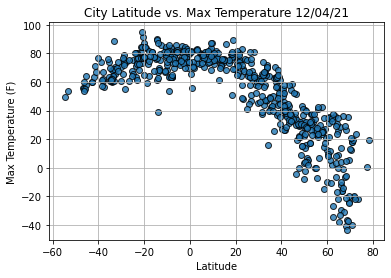

In [44]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

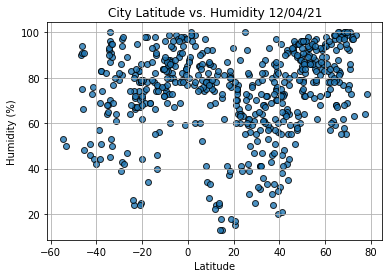

In [45]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

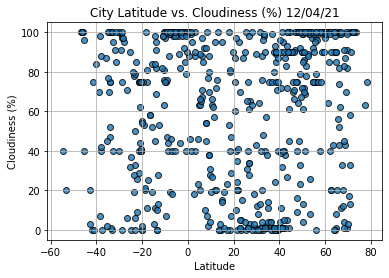

In [46]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

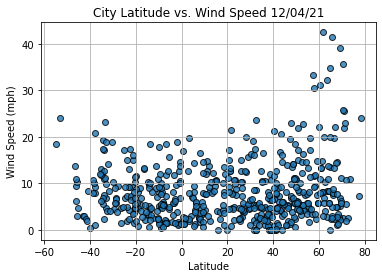

In [47]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [48]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [50]:
index13 = city_data_df.loc[13]
index13

City                       Canela
Country                        BR
Date          2021-12-04 23:25:22
Lat                      -29.3656
Lng                      -50.8156
Max Temp                     65.5
Humidity                       86
Cloudiness                     99
Wind Speed                   4.52
Name: 13, dtype: object

In [51]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
560     True
561     True
562     True
563    False
564     True
Name: Lat, Length: 565, dtype: bool

In [52]:
#Lats greater than or equal to 0 from DF.
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Dikson,RU,2021-12-04 23:25:19,73.5069,80.5464,-22.25,99,100,11.05
2,Chokurdakh,RU,2021-12-04 23:25:19,70.6333,147.9167,-40.41,100,58,2.59
5,Rorvik,NO,2021-12-04 23:25:20,64.8621,11.2373,25.43,68,8,34.72
6,Fort Nelson,CA,2021-12-04 23:25:20,58.8053,-122.7002,-15.21,84,90,2.30
9,Hilo,US,2021-12-04 23:24:57,19.7297,-155.0900,69.24,93,90,0.00
...,...,...,...,...,...,...,...,...,...
559,Penarroya-Pueblonuevo,ES,2021-12-04 23:39:52,38.3000,-5.2667,48.45,87,85,7.45
560,Mitchell,US,2021-12-04 23:36:16,43.7094,-98.0298,37.38,35,90,5.99
561,Panjakent,TJ,2021-12-04 23:39:53,39.4952,67.6093,35.40,82,87,2.71
562,Amio,PH,2021-12-04 23:39:53,9.3571,122.9413,78.06,77,70,12.28


In [54]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

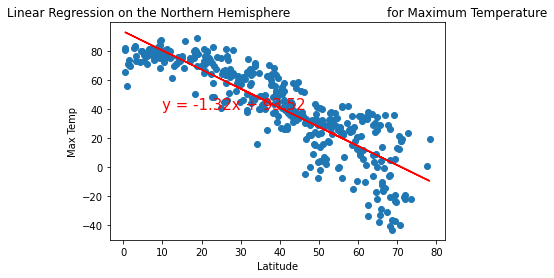

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

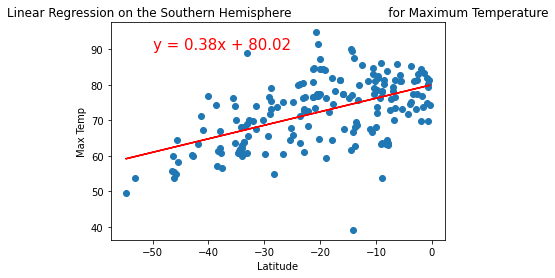

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

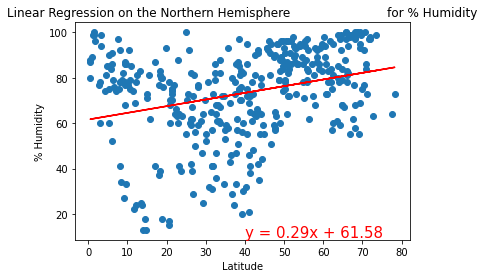

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

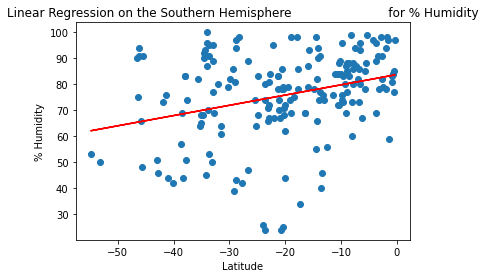

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

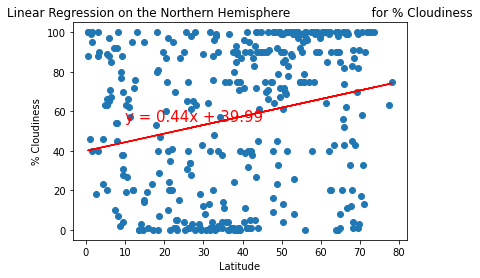

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

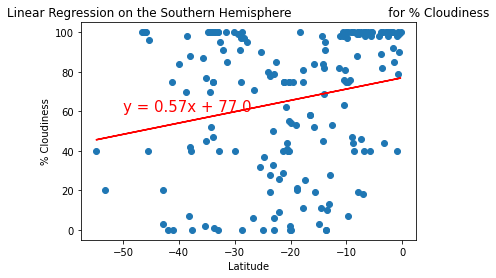

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

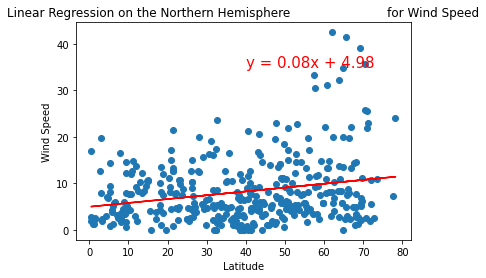

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

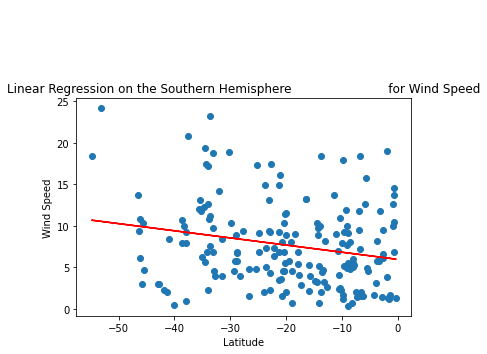

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [2]:
import requests
url = "https://api.spacexdata.com/v2/launchpads"
print(url)

https://api.spacexdata.com/v2/launchpads


In [3]:
len(url)

40